# Loi de Benford et données d'abondance de protéines
Ce script a pour but de vérifier si l'abondance de protéines, d'un fichier d'abondance de protéines extrait depuis [PRIDE](https://www.ebi.ac.uk/pride/), suit la loi de Benford.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

sys.path.insert(0, '..')

import benford

%load_ext autoreload
%autoreload 2

## Téléchargement du jeu de données

In [2]:
if not os.path.exists("1512006-Calbicans-QUANTI.csv"):
    !wget http://ftp.pride.ebi.ac.uk/pride/data/archive/2019/07/PXD014125/1512006-Calbicans-QUANTI.csv

## Chargement et exploration du jeu de données 

In [3]:
data = pd.read_csv("1512006-Calbicans-QUANTI.csv", skiprows=2)

In [4]:
data.shape

(2566, 45)

In [5]:
data.head()

,Accession,Peptide count,Unique peptides,Confidence score,Anova (p),Max fold change,Highest mean condition,Lowest mean condition,Description,1512006-1,...,1512006-2.2,1512006-8.2,1512006-3.2,1512006-9.2,1512006-4.2,1512006-10.2,1512006-5_150410082104.2,1512006-11.2,1512006-6_150410115425.2,1512006-12.2
0,orf19.3365,1,1,29.90,0.000002,inf,Tris 2 60,Tris 1 60,DAO2 CGDID:CAL0004175 COORDS:Ca21chr4_C_albica...,6.290566e+04,...,0,0,0,0,0,0,0,0,0,1
1,orf19.5112,24,24,1946.82,0.000003,3.250834,Ctrl 60,Tris 2 10,TKL1 CGDID:CAL0002508 COORDS:Ca21chr1_C_albica...,3.401376e+07,...,30,21,19,18,17,13,19,24,22,29
2,orf19.3160,4,1,271.39,0.000008,inf,Tris 2 60,Ctrl 10,HSP12 CGDID:CAL0002358 COORDS:Ca21chr5_C_albic...,0.000000e+00,...,0,0,0,0,0,0,0,1,1,1
3,orf19.3646,13,13,604.54,0.000014,27.365113,Ctrl 60,Tris 2 60,CTR1 CGDID:CAL0000406 COORDS:Ca21chr6_C_albica...,1.052686e+07,...,4,3,4,3,15,8,1,2,5,5
4,orf19.1564,2,1,101.16,0.000020,inf,Tris 2 60,Ctrl 10,orf19.1564 CGDID:CAL0005564 COORDS:Ca21chr2_C_...,0.000000e+00,...,0,0,0,0,0,0,0,0,0,1


In [6]:
data.columns

Index(['Accession', 'Peptide count', 'Unique peptides', 'Confidence score',
       'Anova (p)', 'Max fold change', 'Highest mean condition',
       'Lowest mean condition', 'Description', '1512006-1', '1512006-7',
       '1512006-2', '1512006-8', '1512006-3', '1512006-9', '1512006-4',
       '1512006-10', '1512006-5_150410082104', '1512006-11',
       '1512006-6_150410115425', '1512006-12', '1512006-1.1', '1512006-7.1',
       '1512006-2.1', '1512006-8.1', '1512006-3.1', '1512006-9.1',
       '1512006-4.1', '1512006-10.1', '1512006-5_150410082104.1',
       '1512006-11.1', '1512006-6_150410115425.1', '1512006-12.1',
       '1512006-1.2', '1512006-7.2', '1512006-2.2', '1512006-8.2',
       '1512006-3.2', '1512006-9.2', '1512006-4.2', '1512006-10.2',
       '1512006-5_150410082104.2', '1512006-11.2', '1512006-6_150410115425.2',
       '1512006-12.2'],
      dtype='object')

In [7]:
normalized_columns = ['1512006-1', '1512006-7', '1512006-2', '1512006-8',
                      '1512006-3', '1512006-9', '1512006-4', '1512006-10',
                      '1512006-5_150410082104', '1512006-11',
                      '1512006-6_150410115425', '1512006-12']
raw_columns = ['1512006-1.1', '1512006-7.1', '1512006-2.1', '1512006-8.1',
               '1512006-3.1', '1512006-9.1', '1512006-4.1', '1512006-10.1',
               '1512006-5_150410082104.1', '1512006-11.1',
               '1512006-6_150410115425.1', '1512006-12.1']

In [8]:
data.describe()

,Peptide count,Unique peptides,Confidence score,Anova (p),Max fold change,1512006-1,1512006-7,1512006-2,1512006-8,1512006-3,...,1512006-2.2,1512006-8.2,1512006-3.2,1512006-9.2,1512006-4.2,1512006-10.2,1512006-5_150410082104.2,1512006-11.2,1512006-6_150410115425.2,1512006-12.2
count,2566.000000,2566.000000,2566.000000,2356.000000,2356.000000,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,...,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000
mean,5.966875,4.924006,329.951567,0.316327,inf,6.463053e+06,8.785142e+06,6.601764e+06,5.323631e+06,4.636626e+06,...,3.934918,2.997272,2.920109,2.801637,2.675370,1.516758,2.888153,3.286828,3.576383,4.000000
std,6.425649,5.917107,463.406302,0.289389,NaN,2.782584e+07,3.592861e+07,2.682403e+07,2.167646e+07,1.870482e+07,...,7.652240,5.576230,5.713587,5.313268,5.588438,3.486022,5.220402,5.935091,6.629855,7.488835
min,1.000000,0.000000,0.000000,0.000002,1.272817,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,62.225000,0.058240,2.417902,5.596203e+04,7.602239e+04,6.311675e+04,5.691979e+04,4.422048e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,157.265000,0.229864,3.866055,3.728819e+05,5.052376e+05,3.936991e+05,3.310843e+05,2.914040e+05,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,6.000000,389.705000,0.529185,10.111793,1.719191e+06,2.693200e+06,1.997724e+06,1.697935e+06,1.471927e+06,...,4.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,4.000000,4.000000,4.000000
max,52.000000,47.000000,3915.770000,0.996207,inf,5.453465e+08,8.120249e+08,5.426768e+08,4.442926e+08,3.503934e+08,...,96.000000,73.000000,73.000000,65.000000,70.000000,47.000000,56.000000,64.000000,82.000000,95.000000


## Récupération des abondances nomalisées

In [9]:
norm_abundance = data[normalized_columns]
print(norm_abundance.shape)
norm_abundance.head()

(2566, 12)


,1512006-1,1512006-7,1512006-2,1512006-8,1512006-3,1512006-9,1512006-4,1512006-10,1512006-5_150410082104,1512006-11,1512006-6_150410115425,1512006-12
0,6.290566e+04,5.994856e+04,4.275339e+04,8.444083e+04,2.490453e+04,5.681818e+04,1.892062e+05,4.468102e+04,0.000000e+00,0.000000e+00,1.159222e+05,1.439172e+05
1,3.401376e+07,3.451834e+07,2.690502e+07,2.442199e+07,1.765252e+07,1.676820e+07,5.337521e+07,5.852085e+07,2.459692e+07,2.617207e+07,3.230299e+07,3.249965e+07
2,0.000000e+00,0.000000e+00,3.688051e+03,3.230039e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.663895e+03,4.891291e+04,3.373730e+04,3.418780e+04
3,1.052686e+07,1.574501e+07,2.892473e+06,3.440414e+06,1.801286e+06,2.509689e+06,4.534891e+07,5.960580e+07,1.791691e+06,2.429717e+06,1.984907e+06,1.850440e+06
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.095749e+03,2.766132e+04


In [10]:
# données dans un array d'une dimmenssion
norm_abundance = norm_abundance.values.reshape(norm_abundance.shape[0] * norm_abundance.shape[1])
print(norm_abundance.shape)
norm_abundance

(30792,)


array([62905.65962525, 59948.55994256, 42753.39175865, ...,
                  nan,            nan,            nan])

In [11]:
# remove 0
norm_abundance = norm_abundance[norm_abundance > 0]
print(norm_abundance.shape)

(26936,)


## Récupération des abondances non normalisées

In [12]:
raw_abundance = data[raw_columns]
print(raw_abundance.shape)
raw_abundance.head()

(2566, 12)


,1512006-1.1,1512006-7.1,1512006-2.1,1512006-8.1,1512006-3.1,1512006-9.1,1512006-4.1,1512006-10.1,1512006-5_150410082104.1,1512006-11.1,1512006-6_150410115425.1,1512006-12.1
0,9.325899e+04,2.765206e+04,6.973654e+04,6.309967e+04,2.252522e+04,5.307728e+04,9.088306e+04,2.035561e+04,0.000000e+00,0.000000e+00,1.021926e+05,1.794098e+05
1,5.042612e+07,1.592204e+07,4.388571e+07,1.824970e+07,1.596605e+07,1.566419e+07,2.563818e+07,2.666071e+07,1.431299e+07,2.617207e+07,2.847710e+07,4.051467e+07
2,0.000000e+00,0.000000e+00,6.015709e+03,2.413695e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.132027e+03,4.891291e+04,2.974154e+04,4.261914e+04
3,1.560630e+07,7.262593e+06,4.718013e+06,2.570901e+06,1.629196e+06,2.344451e+06,2.178284e+07,2.715498e+07,1.042588e+06,2.429717e+06,1.749820e+06,2.306792e+06
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.729096e+03,3.448312e+04


In [13]:
# données dans un array d'une dimmenssion
raw_abundance = raw_abundance.values.reshape(raw_abundance.shape[0] * raw_abundance.shape[1])
print(raw_abundance.shape)
raw_abundance

(30792,)


array([93258.9877916 , 27652.05578616, 69736.54296873, ...,
           0.        ,     0.        ,     0.        ])

In [14]:
raw_abundance = raw_abundance[raw_abundance > 0]
print(raw_abundance.shape)

(26936,)


## Analyse sur les données d'abondance normalisées
### histograme de la distribution des données normalisées

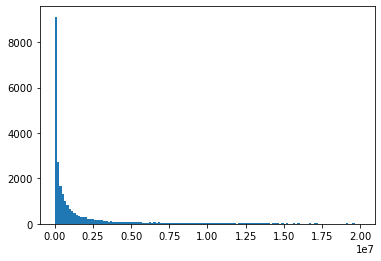

In [15]:
plt.hist(norm_abundance, bins=range(0, 20_000_000, 150_000));

### Analyse des $1^{er}$ digit

In [16]:
f_benford = benford.get_theoretical_freq_benford()
d_obs = benford.count_first_digit(norm_abundance)

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines

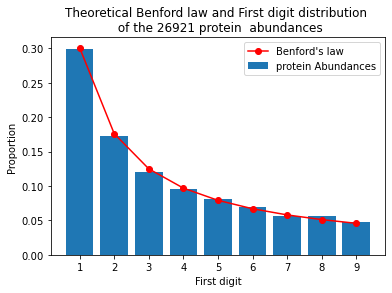

In [17]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=1,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances"),
                            legend="protein Abundances")

### Test statistique par la procédure "bootstrap"

In [18]:
%%time
statistics, p_val, nb_signif = benford.calculate_bootstrap_chi2(norm_abundance, f_benford, nb_digit=1)

statistics : 8.48331498191702 ; p-value : 0.38773594067613637 ; number of significant tests : 78
CPU times: user 4.64 s, sys: 3.43 ms, total: 4.65 s
Wall time: 4.64 s


In [19]:
if p_val > 0.05:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéine suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéine ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que le premier chiffre significatif de l'abondance de protéine suit la loi de Benford pour un risque 𝛼=5%.


## Analyse des deux $1^{er}$ digit

In [20]:
f_benford = benford.get_theoretical_freq_benford(2)
d_obs = benford.count_first_digit(norm_abundance, 2)

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines

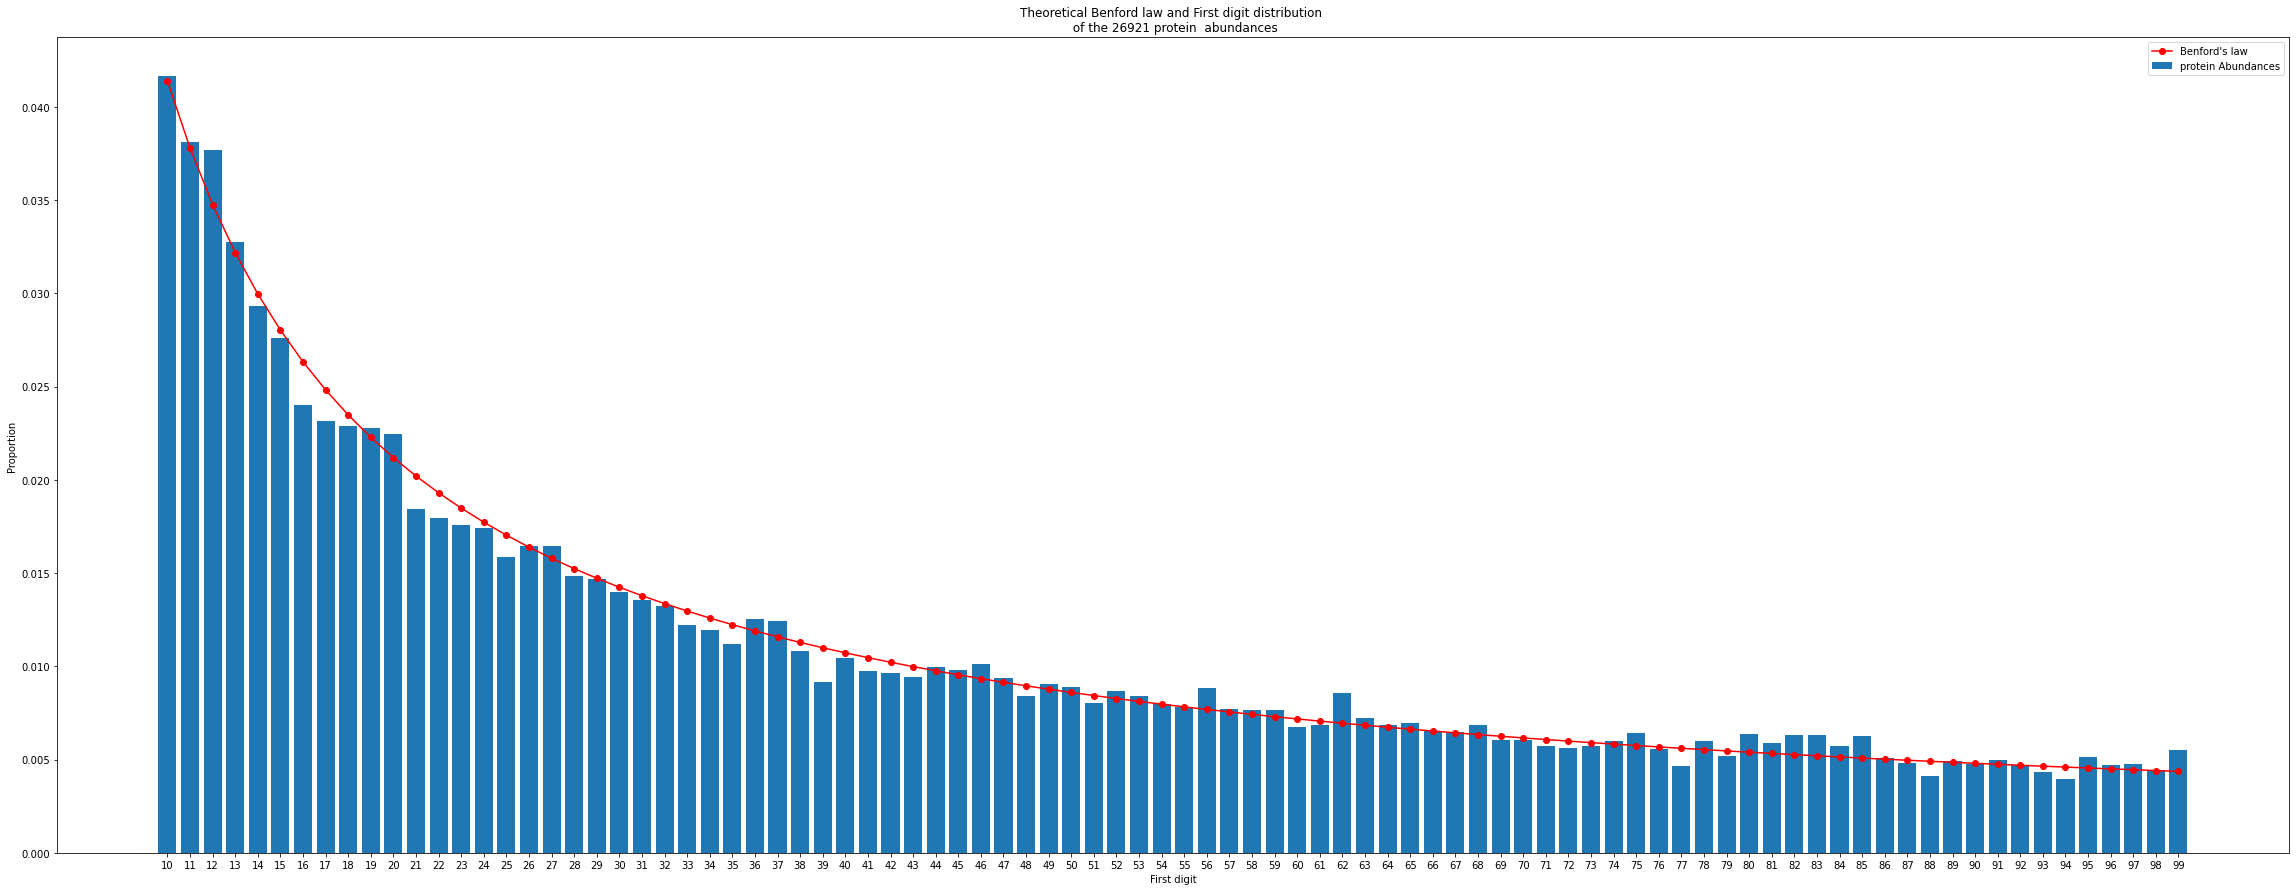

In [21]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=2,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances"),
                            legend="protein Abundances", size=(40, 15))

### Test statistique par la procédure "bootstrap"

In [22]:
%%time
statistics, P_val, nb_signif = benford.calculate_bootstrap_chi2(norm_abundance, f_benford, nb_digit=2)

statistics : 91.1061336411851 ; p-value : 0.4181880712524657 ; number of significant tests : 63
CPU times: user 5.14 s, sys: 0 ns, total: 5.14 s
Wall time: 5.14 s


In [23]:
if p_val > 0.05:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance de protéine suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance de protéine ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que les 2 premiers chiffres significatifs de l'abondance de protéine suit la loi de Benford pour un risque 𝛼=5%.


## Analyse sur les données d'abondance non normalisées
### histograme de la distribution des données non normalisées

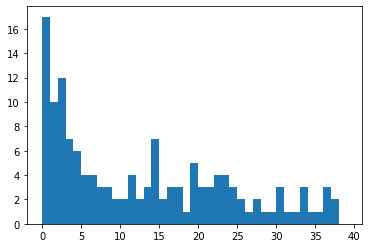

In [24]:
plt.hist(raw_abundance, bins=range(0, 40));

### Analyse des $1^{er}$ digit

In [25]:
f_benford = benford.get_theoretical_freq_benford()
d_obs = benford.count_first_digit(raw_abundance)

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines

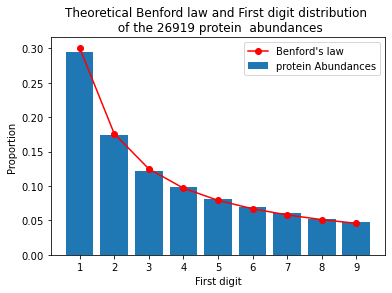

In [26]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=1,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances"),
                            legend="protein Abundances")

### Test statistique par la procédure "bootstrap"

In [27]:
%%time
statistics, p_val, nb_signif = benford.calculate_bootstrap_chi2(raw_abundance, f_benford, nb_digit=1)

statistics : 8.387657165147711 ; p-value : 0.3965471092961479 ; number of significant tests : 57
CPU times: user 4.83 s, sys: 0 ns, total: 4.83 s
Wall time: 4.83 s


In [28]:
if p_val > 0.05:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéine suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéine ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que le premier chiffre significatif de l'abondance de protéine suit la loi de Benford pour un risque 𝛼=5%.


## Analyse des deux $1^{er}$ digit

In [29]:
f_benford = benford.get_theoretical_freq_benford(2)
d_obs = benford.count_first_digit(raw_abundance, 2)

### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines

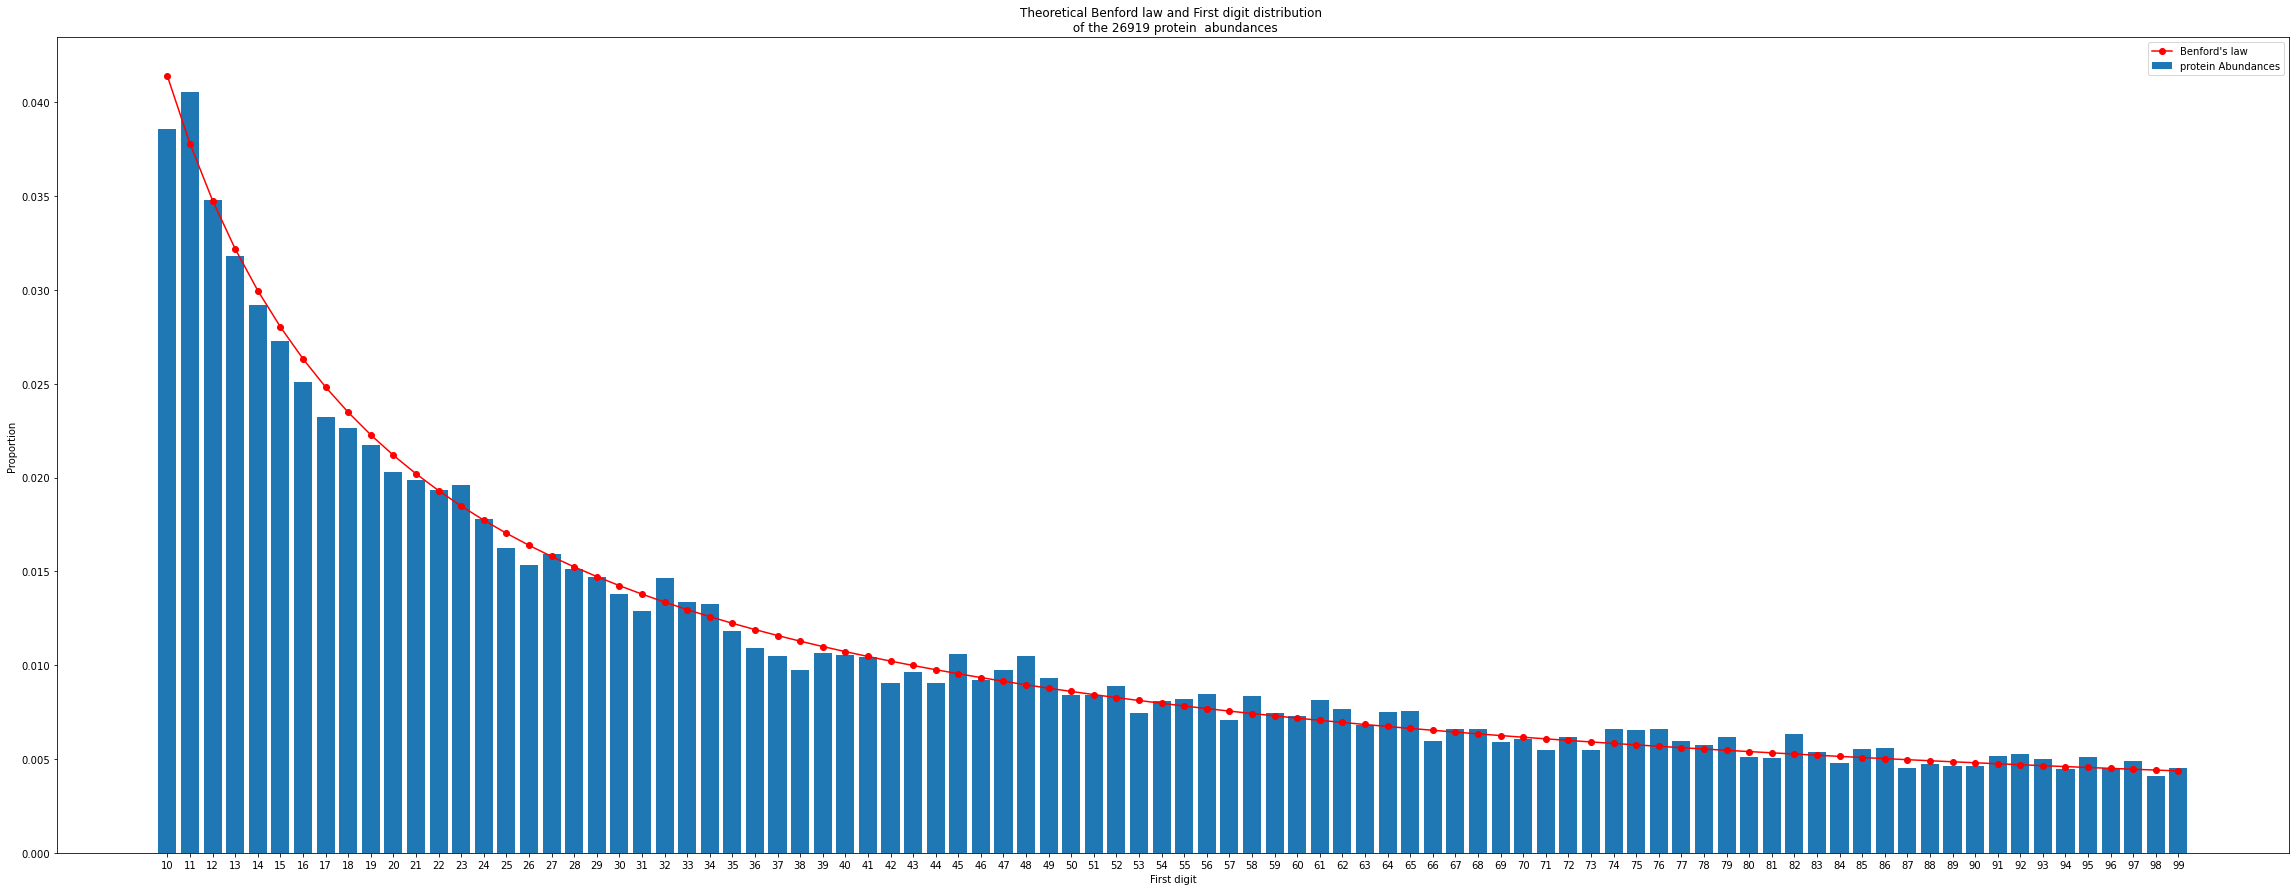

In [30]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=2,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances"),
                            legend="protein Abundances", size=(40, 15))

### Test statistique par la procédure "bootstrap"

In [31]:
%%time
statistics, P_val, nb_signif = benford.calculate_bootstrap_chi2(raw_abundance, f_benford, nb_digit=2)

statistics : 91.254671042847 ; p-value : 0.4139173371915989 ; number of significant tests : 83
CPU times: user 5.06 s, sys: 3.86 ms, total: 5.07 s
Wall time: 5.06 s


In [32]:
if p_val > 0.05:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance de protéine suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance de protéine ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que les 2 premiers chiffres significatifs de l'abondance de protéine suit la loi de Benford pour un risque 𝛼=5%.
